## HW1 ASSIGNMENT 2

### OBJECTIVES

* Perform basic data engineering and visualization in Python using an external data set.
* Perform data engineering in Python using OpenAQ API.
* Perform basic data analysis in Python using OpenAQ weather data.
* Perform basic statistical significance tests of air quality data.
* Complete the online HW1 assessment.
* BONUS: Build and analyze a more complex OpenAQ data set. 

## Perfom basic data engineering and visualization in Python using an external set data.

In [1]:
# IMPORTING LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import time
import json 
import os
import folium 
from scipy import stats

### § Task: Use Python to make HTTP/API calls to obtain and prepare data.

In [2]:
## Function to obtain the list of all US airports
def get_airport_data(url):
    # Read the data into the data frame
    airport_data = pd.read_csv(url)
    # Save data frame to a CSV file 
    airport_data.to_csv('all_us_airports.csv', index=False)

    print("Data saved successfully")

data_url = "https://ourairports.com/countries/US/airports.csv"
get_airport_data(data_url)

Data saved successfully


In [3]:
US_airport = pd.read_csv("all_us_airports.csv")
US_airport

,id,ident,type,name,latitude_deg,longitude_deg,elevation_ft,continent,country_name,iso_country,...,municipality,scheduled_service,gps_code,iata_code,local_code,home_link,wikipedia_link,keywords,score,last_updated
0,3632,KLAX,large_airport,Los Angeles International Airport,33.942501,-118.407997,125.0,NaN,United States,US,...,Los Angeles,1,KLAX,LAX,LAX,https://www.flylax.com/,https://en.wikipedia.org/wiki/Los_Angeles_Inte...,Tom Bradley,1335475,2023-12-21T12:31:02+00:00
1,3754,KORD,large_airport,Chicago O'Hare International Airport,41.978600,-87.904800,672.0,NaN,United States,US,...,Chicago,1,KORD,ORD,ORD,https://www.flychicago.com/ohare/home/pages/de...,https://en.wikipedia.org/wiki/O'Hare_Internati...,"CHI, Orchard Place",1503175,2018-09-16T02:35:35+00:00
2,3622,KJFK,large_airport,John F Kennedy International Airport,40.639447,-73.779317,13.0,NaN,United States,US,...,New York,1,KJFK,JFK,JFK,https://www.jfkairport.com/,https://en.wikipedia.org/wiki/John_F._Kennedy_...,"Manhattan, New York City, NYC, Idlewild, IDL, ...",1052075,2022-10-18T18:49:55+00:00
3,3384,KATL,large_airport,Hartsfield Jackson Atlanta International Airport,33.636700,-84.428101,1026.0,NaN,United States,US,...,Atlanta,1,KATL,ATL,ATL,http://www.atlanta-airport.com/,https://en.wikipedia.org/wiki/Hartsfield–Jacks...,NaN,2002475,2018-09-19T14:50:01+00:00
4,3878,KSFO,large_airport,San Francisco International Airport,37.618999,-122.375000,13.0,NaN,United States,US,...,San Francisco,1,KSFO,SFO,SFO,http://www.flysfo.com/,https://en.wikipedia.org/wiki/San_Francisco_In...,"QSF, QBA",1112475,2008-06-13T14:30:04+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30934,353111,US-6578,closed,Kettenpom Airport,40.160970,-123.463850,3408.0,NaN,United States,US,...,Zenia,0,NaN,NaN,NaN,NaN,NaN,NaN,0,2022-02-28T15:05:57+00:00
30935,322813,US-0527,heliport,AdventHealth Zephyrhills Heliport,28.261934,-82.185663,160.0,NaN,United States,US,...,Zephyrhills,0,FD75,NaN,FD75,NaN,NaN,Florida Hospital Zephyrhills Heliport,0,2021-06-11T17:55:06+00:00
30936,324916,US-0652,heliport,Rotary Run Heliport,40.605805,-81.415002,1027.0,NaN,United States,US,...,Zoar,0,NaN,NaN,0OH2,NaN,NaN,NaN,0,2017-09-09T20:04:27+00:00
30937,327838,US-0874,heliport,Black Rock Heliport,35.084975,-108.788350,6454.0,NaN,United States,US,...,Zuni,0,NaN,NaN,NM1,NaN,NaN,NaN,0,2018-05-15T23:12:01+00:00


In [4]:
US_airport.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30939 entries, 0 to 30938
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 30939 non-null  int64  
 1   ident              30939 non-null  object 
 2   type               30939 non-null  object 
 3   name               30939 non-null  object 
 4   latitude_deg       30939 non-null  float64
 5   longitude_deg      30939 non-null  float64
 6   elevation_ft       28933 non-null  float64
 7   continent          110 non-null    object 
 8   country_name       30939 non-null  object 
 9   iso_country        30939 non-null  object 
 10  region_name        30939 non-null  object 
 11  iso_region         30939 non-null  object 
 12  local_region       30939 non-null  object 
 13  municipality       30881 non-null  object 
 14  scheduled_service  30939 non-null  int64  
 15  gps_code           20315 non-null  object 
 16  iata_code          197

In [5]:
# Checking for null values 
US_airport.isnull().sum()

id                       0
ident                    0
type                     0
name                     0
latitude_deg             0
longitude_deg            0
elevation_ft          2006
continent            30829
country_name             0
iso_country              0
region_name              0
iso_region               0
local_region             0
municipality            58
scheduled_service        0
gps_code             10624
iata_code            28968
local_code            9699
home_link            29776
wikipedia_link       28348
keywords             24782
score                    0
last_updated             0
dtype: int64

In [6]:
# We can see that the continent has more NAN values so we are going to remove the column 
US_airport = US_airport.drop('continent', axis = 1)

In [7]:
# We are also removing the non-essential column from the data frame.
# Like id, iso_country, iso_region, local_region, country_name, last_updated, home link, wikipedia link
US_airport = US_airport.drop(['id', 'country_name','iso_country', 'iso_region', 'local_region', 'home_link', 'wikipedia_link'], axis = 1)

In [8]:
# Removing NAN value from dataset 
US_airport = US_airport.dropna(subset = ['iata_code'])

In [9]:
US_airport.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1971 entries, 0 to 30927
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ident              1971 non-null   object 
 1   type               1971 non-null   object 
 2   name               1971 non-null   object 
 3   latitude_deg       1971 non-null   float64
 4   longitude_deg      1971 non-null   float64
 5   elevation_ft       1941 non-null   float64
 6   region_name        1971 non-null   object 
 7   municipality       1971 non-null   object 
 8   scheduled_service  1971 non-null   int64  
 9   gps_code           1896 non-null   object 
 10  iata_code          1971 non-null   object 
 11  local_code         1957 non-null   object 
 12  keywords           483 non-null    object 
 13  score              1971 non-null   int64  
 14  last_updated       1971 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 246.4+ KB


### § Task: Filter data to a subset for further use.

In [10]:
def filter_large_airports():
    # Load the data from the CSV file
    filtered_data = pd.read_csv('all_us_airports.csv')

    # Filter the data to include only large airports
    filtered_data = filtered_data[filtered_data['type'] == 'large_airport']

    # Select only the relevant columns
    filtered_data = filtered_data[['name', 'latitude_deg', 'longitude_deg', 'iata_code']]

    # Save the filtered data to a new CSV file
    filtered_data.to_csv('large_us_airports.csv', index=False)

    print("Data filtered and saved successfully!")

# Call the function
filter_large_airports()

Data filtered and saved successfully!


In [11]:
large_airport_data = pd.read_csv("large_us_airports.csv")
large_airport_data

,name,latitude_deg,longitude_deg,iata_code
0,Los Angeles International Airport,33.942501,-118.407997,LAX
1,Chicago O'Hare International Airport,41.978600,-87.904800,ORD
2,John F Kennedy International Airport,40.639447,-73.779317,JFK
3,Hartsfield Jackson Atlanta International Airport,33.636700,-84.428101,ATL
4,San Francisco International Airport,37.618999,-122.375000,SFO
...,...,...,...,...
62,Portland International Jetport,43.646198,-70.309303,PWM
63,Orlando Sanford International Airport,28.777599,-81.237503,SFB
64,Fairbanks International Airport,64.815102,-147.856003,FAI
65,Camarillo International Airport,34.213699,-119.094002,NaN


In [12]:
large_airport_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           67 non-null     object 
 1   latitude_deg   67 non-null     float64
 2   longitude_deg  67 non-null     float64
 3   iata_code      66 non-null     object 
dtypes: float64(2), object(2)
memory usage: 2.2+ KB


In [13]:
# One of the columns has one NaN value which we will ignore by removing it 
rows_with_nan = large_airport_data[large_airport_data.isna().any(axis = 1)]
print(rows_with_nan)

                               name  latitude_deg  longitude_deg iata_code
65  Camarillo International Airport     34.213699    -119.094002       NaN


In [14]:
# Removing the row with nan value 
large_airport_data = large_airport_data.drop(rows_with_nan.index)
large_airport_data

,name,latitude_deg,longitude_deg,iata_code
0,Los Angeles International Airport,33.942501,-118.407997,LAX
1,Chicago O'Hare International Airport,41.978600,-87.904800,ORD
2,John F Kennedy International Airport,40.639447,-73.779317,JFK
3,Hartsfield Jackson Atlanta International Airport,33.636700,-84.428101,ATL
4,San Francisco International Airport,37.618999,-122.375000,SFO
...,...,...,...,...
61,Tulsa International Airport,36.198399,-95.888100,TUL
62,Portland International Jetport,43.646198,-70.309303,PWM
63,Orlando Sanford International Airport,28.777599,-81.237503,SFB
64,Fairbanks International Airport,64.815102,-147.856003,FAI


### § Task: Plot the data using Folium

In [15]:
# Installing Folium 
!pip install folium

In [16]:
# Plotting the map 
latitude_longitude = [large_airport_data['latitude_deg'].mean(), large_airport_data['longitude_deg'].mean()]
map = folium.Map(
    location = latitude_longitude,
    zoom_start = 5,
)
# Iterating through the dataset 
for index, row in large_airport_data.iterrows():
    angle = 315
    popup_content = f"{row['name']} ({row['iata_code']})"
    icon_params = {"prefix": "fa", "icon": "plane"}
    icon = folium.Icon(angle = angle, **icon_params)
    folium.Marker(location = [row['latitude_deg'], row['longitude_deg']],
                  popup = popup_content,
                  icon = icon).add_to(map)

map.save('large_airport_map.html')
map

## Perform data engineering in Python using OpenAQ API.

### § Task: Obtain a dataset from OpenAQ

In [17]:
# Function to fetch data 
def fetch_openaq_data(date_from, date_to, coordinates, radius, parameter_id, limit):
    # Define the base URL for the OpenAQ API
    base_url = "https://api.openaq.org/v2/measurements"

    # Define parameters for the API request
    params = {
        "date_from": date_from,
        "date_to": date_to,
        "coordinates": coordinates,
        "radius": radius,
        "parameter_id": parameter_id,
        "limit": limit
    }

    # Define headers for the API request
    headers = {"accept": "application/json"}

    # Send a GET request to the OpenAQ API
    response = requests.get(base_url, params=params, headers=headers)

    # Check if the request was successful
    if response.status_code == 200:
        data = response.json()
        return data
    else:
        print(f"Request failed with status code {response.status_code}")
        return None

# Function to load JSON data and convert to DataFrame
def load_openaq_data(data):
    try:
        # Create a DataFrame from the 'results' key in the loaded data
        openaq_data = pd.DataFrame(data['results'])
        return openaq_data
    except KeyError:
        print("Key 'results' not found in JSON data.")
        return None

In [18]:
# Call function to fetch the data
detroit_data = fetch_openaq_data("2023-06-06T00:00:00Z", "2023-06-06T23:59:59Z", "42.33143000,-83.04575000", 7500, 2, 10000)
Detroit_data = load_openaq_data(detroit_data)
Detroit_data

,locationId,location,parameter,value,date,unit,coordinates,country,city,isMobile,isAnalysis,entity,sensorType
0,1385,Windsor Downtown,pm25,125.0,"{'utc': '2023-06-06T23:00:00+00:00', 'local': ...",µg/m³,"{'latitude': 42.3144, 'longitude': -83.0433}",US,None,False,None,Governmental Organization,reference grade
1,1385,Windsor Downtown,pm25,21.0,"{'utc': '2023-06-06T22:00:00+00:00', 'local': ...",µg/m³,"{'latitude': 42.3144, 'longitude': -83.0433}",US,None,False,None,Governmental Organization,reference grade
2,1385,Windsor Downtown,pm25,14.0,"{'utc': '2023-06-06T21:00:00+00:00', 'local': ...",µg/m³,"{'latitude': 42.3144, 'longitude': -83.0433}",US,None,False,None,Governmental Organization,reference grade
3,1385,Windsor Downtown,pm25,18.0,"{'utc': '2023-06-06T20:00:00+00:00', 'local': ...",µg/m³,"{'latitude': 42.3144, 'longitude': -83.0433}",US,None,False,None,Governmental Organization,reference grade
4,1385,Windsor Downtown,pm25,21.0,"{'utc': '2023-06-06T19:00:00+00:00', 'local': ...",µg/m³,"{'latitude': 42.3144, 'longitude': -83.0433}",US,None,False,None,Governmental Organization,reference grade
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6279,7002,MILITARY PARK,pm25,33.7,"{'utc': '2023-06-06T05:00:00+00:00', 'local': ...",µg/m³,"{'latitude': 42.312078, 'longitude': -83.103469}",US,None,False,None,Governmental Organization,reference grade
6280,7002,MILITARY PARK,pm25,31.7,"{'utc': '2023-06-06T04:00:00+00:00', 'local': ...",µg/m³,"{'latitude': 42.312078, 'longitude': -83.103469}",US,None,False,None,Governmental Organization,reference grade
6281,7002,MILITARY PARK,pm25,29.9,"{'utc': '2023-06-06T03:00:00+00:00', 'local': ...",µg/m³,"{'latitude': 42.312078, 'longitude': -83.103469}",US,None,False,None,Governmental Organization,reference grade
6282,7002,MILITARY PARK,pm25,28.8,"{'utc': '2023-06-06T02:00:00+00:00', 'local': ...",µg/m³,"{'latitude': 42.312078, 'longitude': -83.103469}",US,None,False,None,Governmental Organization,reference grade


### § Task: Transform, filter and store the OpenAQ data as CSV

#### Transform

In [19]:
# Function to convert the coordinates field to two fields: sensor_lat and sensor_lon
def transform_openaq_data(data):
    openaq_data = data.copy()
    openaq_data['sensor_lat'] = openaq_data['coordinates'].apply(lambda x: x['latitude'])
    openaq_data['sensor_lon'] = openaq_data['coordinates'].apply(lambda x: x['longitude'])
    openaq_data['local_time'] = pd.to_datetime(openaq_data['date'].apply(lambda x: x['local']))
    
    # Drop the original 'coordinate' column
    openaq_data.drop(columns=['date'], inplace = True)
    return openaq_data

In [20]:
transformed_detroit_data = transform_openaq_data(Detroit_data)
transformed_detroit_data

,locationId,location,parameter,value,unit,coordinates,country,city,isMobile,isAnalysis,entity,sensorType,sensor_lat,sensor_lon,local_time
0,1385,Windsor Downtown,pm25,125.0,µg/m³,"{'latitude': 42.3144, 'longitude': -83.0433}",US,None,False,None,Governmental Organization,reference grade,42.314400,-83.043300,2023-06-06 19:00:00-04:00
1,1385,Windsor Downtown,pm25,21.0,µg/m³,"{'latitude': 42.3144, 'longitude': -83.0433}",US,None,False,None,Governmental Organization,reference grade,42.314400,-83.043300,2023-06-06 18:00:00-04:00
2,1385,Windsor Downtown,pm25,14.0,µg/m³,"{'latitude': 42.3144, 'longitude': -83.0433}",US,None,False,None,Governmental Organization,reference grade,42.314400,-83.043300,2023-06-06 17:00:00-04:00
3,1385,Windsor Downtown,pm25,18.0,µg/m³,"{'latitude': 42.3144, 'longitude': -83.0433}",US,None,False,None,Governmental Organization,reference grade,42.314400,-83.043300,2023-06-06 16:00:00-04:00
4,1385,Windsor Downtown,pm25,21.0,µg/m³,"{'latitude': 42.3144, 'longitude': -83.0433}",US,None,False,None,Governmental Organization,reference grade,42.314400,-83.043300,2023-06-06 15:00:00-04:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6279,7002,MILITARY PARK,pm25,33.7,µg/m³,"{'latitude': 42.312078, 'longitude': -83.103469}",US,None,False,None,Governmental Organization,reference grade,42.312078,-83.103469,2023-06-06 01:00:00-04:00
6280,7002,MILITARY PARK,pm25,31.7,µg/m³,"{'latitude': 42.312078, 'longitude': -83.103469}",US,None,False,None,Governmental Organization,reference grade,42.312078,-83.103469,2023-06-06 00:00:00-04:00
6281,7002,MILITARY PARK,pm25,29.9,µg/m³,"{'latitude': 42.312078, 'longitude': -83.103469}",US,None,False,None,Governmental Organization,reference grade,42.312078,-83.103469,2023-06-05 23:00:00-04:00
6282,7002,MILITARY PARK,pm25,28.8,µg/m³,"{'latitude': 42.312078, 'longitude': -83.103469}",US,None,False,None,Governmental Organization,reference grade,42.312078,-83.103469,2023-06-05 22:00:00-04:00


#### Filter

In [21]:
def filter_openaq_data(transformed_data):
    filtered_data = transformed_data[['locationId', 'location', 'entity', 'parameter', 'value', 'local_time', 'sensor_lat', 'sensor_lon']]
    
    # Filter the data to include only Governmental Organization and Community Organization
    filtered_data = filtered_data[filtered_data['entity'].isin(['Governmental Organization', 'Community Organization'])]
    return filtered_data

In [22]:
filtered_detroit_data = filter_openaq_data(transformed_detroit_data)
filtered_detroit_data

,locationId,location,entity,parameter,value,local_time,sensor_lat,sensor_lon
0,1385,Windsor Downtown,Governmental Organization,pm25,125.0,2023-06-06 19:00:00-04:00,42.314400,-83.043300
1,1385,Windsor Downtown,Governmental Organization,pm25,21.0,2023-06-06 18:00:00-04:00,42.314400,-83.043300
2,1385,Windsor Downtown,Governmental Organization,pm25,14.0,2023-06-06 17:00:00-04:00,42.314400,-83.043300
3,1385,Windsor Downtown,Governmental Organization,pm25,18.0,2023-06-06 16:00:00-04:00,42.314400,-83.043300
4,1385,Windsor Downtown,Governmental Organization,pm25,21.0,2023-06-06 15:00:00-04:00,42.314400,-83.043300
...,...,...,...,...,...,...,...,...
6279,7002,MILITARY PARK,Governmental Organization,pm25,33.7,2023-06-06 01:00:00-04:00,42.312078,-83.103469
6280,7002,MILITARY PARK,Governmental Organization,pm25,31.7,2023-06-06 00:00:00-04:00,42.312078,-83.103469
6281,7002,MILITARY PARK,Governmental Organization,pm25,29.9,2023-06-05 23:00:00-04:00,42.312078,-83.103469
6282,7002,MILITARY PARK,Governmental Organization,pm25,28.8,2023-06-05 22:00:00-04:00,42.312078,-83.103469


#### Store

In [23]:
# Save the filtered data to a new CSV file
filtered_detroit_data.to_csv('20230606_detroit_downtown_7_5km_aq.csv', index = False)
print("Data filtered and saved successfully!") 

Data filtered and saved successfully!


In [24]:
# Load the data 
detroit_downtown_data = pd.read_csv('20230606_detroit_downtown_7_5km_aq.csv')
detroit_downtown_data

,locationId,location,entity,parameter,value,local_time,sensor_lat,sensor_lon
0,1385,Windsor Downtown,Governmental Organization,pm25,125.0,2023-06-06 19:00:00-04:00,42.314400,-83.043300
1,1385,Windsor Downtown,Governmental Organization,pm25,21.0,2023-06-06 18:00:00-04:00,42.314400,-83.043300
2,1385,Windsor Downtown,Governmental Organization,pm25,14.0,2023-06-06 17:00:00-04:00,42.314400,-83.043300
3,1385,Windsor Downtown,Governmental Organization,pm25,18.0,2023-06-06 16:00:00-04:00,42.314400,-83.043300
4,1385,Windsor Downtown,Governmental Organization,pm25,21.0,2023-06-06 15:00:00-04:00,42.314400,-83.043300
...,...,...,...,...,...,...,...,...
6279,7002,MILITARY PARK,Governmental Organization,pm25,33.7,2023-06-06 01:00:00-04:00,42.312078,-83.103469
6280,7002,MILITARY PARK,Governmental Organization,pm25,31.7,2023-06-06 00:00:00-04:00,42.312078,-83.103469
6281,7002,MILITARY PARK,Governmental Organization,pm25,29.9,2023-06-05 23:00:00-04:00,42.312078,-83.103469
6282,7002,MILITARY PARK,Governmental Organization,pm25,28.8,2023-06-05 22:00:00-04:00,42.312078,-83.103469


### Perfom basic data analysis in Python using OpenAQ weather data.

In [25]:
detroit_downtown_data.isnull().sum()

locationId    0
location      0
entity        0
parameter     0
value         0
local_time    0
sensor_lat    0
sensor_lon    0
dtype: int64

In [26]:
detroit_downtown_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6284 entries, 0 to 6283
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   locationId  6284 non-null   int64  
 1   location    6284 non-null   object 
 2   entity      6284 non-null   object 
 3   parameter   6284 non-null   object 
 4   value       6284 non-null   float64
 5   local_time  6284 non-null   object 
 6   sensor_lat  6284 non-null   float64
 7   sensor_lon  6284 non-null   float64
dtypes: float64(3), int64(1), object(4)
memory usage: 392.9+ KB


#### § Task: Load your Detroit data and answer the following questions

In [27]:
def calculate_openaq_statistics(openaq_data):
    statistics = {}
    # 1. What is the mean and median PM2.5 reading over all sensors?
    statistics['PM25_Mean'] = openaq_data['value'].mean()
    statistics['PM25_Median'] = openaq_data['value'].median()

    # 2. What is the standard deviation?
    statistics['Standard_deviation'] = openaq_data['value'].std()

   # 3. Which location_id recorded the highest PM2.5? What was the reading?
    max_pm25_row = openaq_data.loc[openaq_data['value'].idxmax()]
    statistics['highest_PM25_location_id'] = max_pm25_row['locationId']
    statistics['highest_PM25'] = max_pm25_row['value']

    # 4. What is the ratio of Community Organization to Governmental Organization entity type?
    entity_counts = openaq_data['entity'].value_counts(normalize=True)
    statistics['ratio_community_to_government'] = entity_counts.get('Community Organization', 0) / entity_counts.get('Governmental Organization', 1)

    # 5. How many unique sensor stations are in the data (use locationId)?
    statistics['unique_sensor_stations'] = openaq_data['locationId'].nunique()

    # 6. What is the station density per km?
    area_km = 7.5  # Assuming the area is 7.5 km as mentioned
    statistics['station_density_per_km'] = statistics['unique_sensor_stations'] / area_km

    return statistics

In [28]:
statistics = calculate_openaq_statistics(detroit_downtown_data)
for key, value in statistics.items():
    print(f"{key}: {value}")

PM25_Mean: 66.0975970719287
PM25_Median: 37.05
Standard_deviation: 216.46080063153576
highest_PM25_location_id: 65949
highest_PM25: 1759.5
ratio_community_to_government: 67.30434782608695
unique_sensor_stations: 15
station_density_per_km: 2.0


In [29]:
def calculate_daily_statistics(data):
    # Make a copy of the data and convert 'local_time' to date format
    data_copy = data.copy()
    data_copy['local_time'] = pd.to_datetime(data_copy['local_time']).dt.date

    # Group data by 'entity' and 'local_time'
    grouped_data = data_copy.groupby(['local_time', 'entity'])

    # Calculate statistics for each group
    statistics = grouped_data['value'].agg(['mean', 'median', 'min', 'max', lambda x: x.quantile(0.75), 'std'])

    # Rename columns for clarity
    statistics.columns = ['Mean', 'Median', 'Min', 'Max', '75th Percentile', 'Standard Deviation']

    # Reset index to make 'entity' and 'local_time' regular columns
    statistics.reset_index(inplace=True)

    return statistics

In [30]:
detroit_downtown_data_statistics = calculate_daily_statistics(detroit_downtown_data)
detroit_downtown_data_statistics

,local_time,entity,Mean,Median,Min,Max,75th Percentile,Standard Deviation
0,2023-06-05,Community Organization,34.081768,35.70,21.3,49.6,37.700,5.645283
1,2023-06-05,Governmental Organization,28.458333,28.55,26.4,30.3,29.200,1.244960
2,2023-06-06,Community Organization,73.460674,38.50,6.1,1759.5,46.500,239.515061
3,2023-06-06,Governmental Organization,36.410000,35.75,14.0,125.0,46.825,15.392811


### PM2.5 Analysis 
- The **Mean** is slightly higher than **Median** indicating that the distribution of PM2.5 is slightly towards higher values or it outliers could be present.
- The large **Standard deviation** could indicate wide variability of PM2.5 readings.
- The **Highest PM2.5** reading occurred at location ID: 65949 with a value: 1759.5 indicating severe pollution or high emissions.
- The **Ratio of Community Organization to Governmental Organization** is approximately 67.3 which indicates a greater number of readings from community organizations than government organization sensors.
- There are 15 **unique sensors** with **station density** of 2.0 per km. 

##### 8. What is your opinion of the differences in the statistics? Comment specifically about the mean and 75%.
- The **mean PM2.5** recorded by the community organization sensors tends to be **higher** than government organization sensors on both dates. This indicates that the community sensors may be exposed to higher pollution levels or present in greater pollution sources compared to the government sensors.
- The 75th percentile value represents the value below which 75% of the data falls. Community organization sensors exhibit a **higher 75% percentile value** compared to government organization sensors on both dates. This indicates that the community sensors may be exposed to higher pollution levels or present in greater pollution sources compared to the government sensors.

### § Task: Build a map of the stations

In [31]:
# Plotting the map 
detroit_map = folium.Map(
    location = [42.33143,-83.04575],
    zoom_start = 12,
)

folium.Marker(
    [42.3314,-83.04575],
    popup = "Downtown Detroit",
    icon = folium.Icon(color = 'blue', icon = 'city', prefix = 'fa')).add_to(detroit_map)

# Iterating through the dataset 
for index, row in detroit_downtown_data.iterrows():
    if row['entity'] == "Community Organization":
        # Green Pin for Community organization sensors
        folium.Marker(
            [row['sensor_lat'], row['sensor_lon']],
            popup = f"{row['location']} (Community)",
            icon = folium.Icon(color = 'green', icon = 'info-sign', prefix = 'glyphicon')).add_to(detroit_map)
    elif row['entity'] == "Governmental Organization":
        # Red Pin for Government organization sensors
        folium.Marker(
            [row['sensor_lat'], row['sensor_lon']],
            popup = f"{row['location']} (Government)",
            icon = folium.Icon(color = 'red', icon = 'asterisk', prefix = 'glyphicon')).add_to(detroit_map)

detroit_map.save('detroit_map.html')

### § Task: Explore hourly averages for the day

In [32]:
# Function to find hourly averages 
def process_openaq_data(data):
    # Convert 'local_time' to datetime format
    data['local_time'] = pd.to_datetime(data['local_time'], utc=True)

    # Define the 6-hour blocks
    blocks = [(0, 6), (6, 12), (12, 18), (18, 24)]

    # Create a function to categorize the hour into the corresponding block
    def categorize_hour(hour):
        for block in blocks:
            if block[0] <= hour < block[1]:
                return block

    # Categorize each hour into the corresponding block
    data['block'] = data['local_time'].dt.hour.apply(categorize_hour)

    # Group by 'entity' and 'block', then calculate the average readings for each group
    average_readings = data.groupby(['entity', 'block'])['value'].mean().reset_index(name = 'Average Reading')

    # Extract hour from 'local_time'
    data['hour'] = detroit_downtown_data['local_time'].dt.hour

    # Group by 'entity' and 'hour', then calculate the average readings for each group
    hourly_avg = data.groupby(['entity', 'hour'])['value'].mean().reset_index(name = 'Hourly average')

    # Plotting the hourly averages for the day
    plt.figure(figsize=(12, 6))
    for entity in hourly_avg['entity'].unique():
        entity_data = hourly_avg[hourly_avg['entity'] == entity]
        color = 'blue' if entity == 'Governmental Organization' else 'orange'
        plt.plot(entity_data['hour'], entity_data['Hourly average'], label = entity, color = color)

    plt.title("Hourly PM2.5 Averages for June 6, 2023 (Detroit, MI)")
    plt.xlabel("Hour (0-23)")
    plt.ylabel("PM2.5 Value")
    plt.legend(title = "Sensor Type")
    plt.xticks(range(24))
    plt.show()

    return average_readings

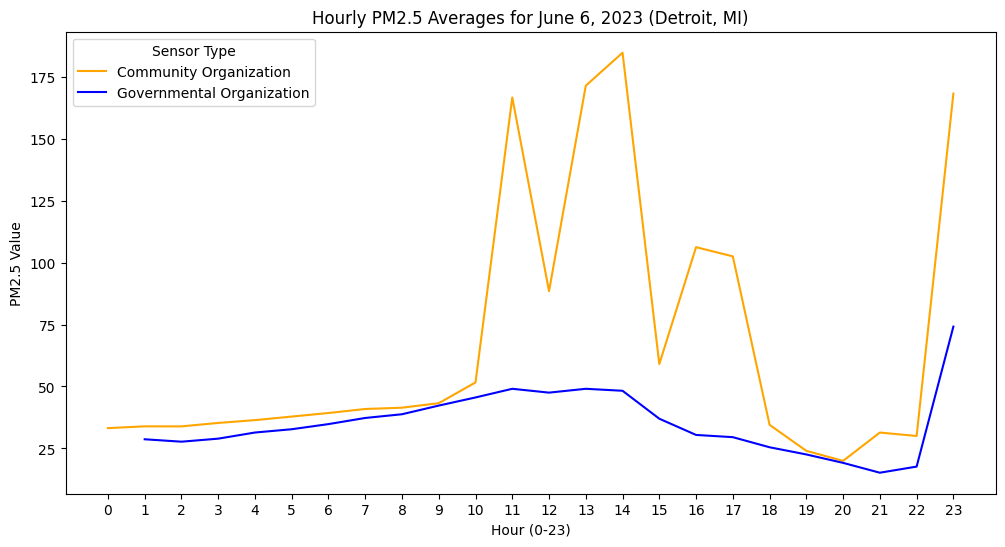

,entity,block,Average Reading
0,Community Organization,"(0, 6)",35.095077
1,Community Organization,"(6, 12)",62.490485
2,Community Organization,"(12, 18)",118.638343
3,Community Organization,"(18, 24)",50.021926
4,Governmental Organization,"(0, 6)",29.910000
5,Governmental Organization,"(6, 12)",41.312500
6,Governmental Organization,"(12, 18)",40.312500
7,Governmental Organization,"(18, 24)",29.045833


In [33]:
# Call function to find hourly average and plot 
average_readings_detroit = process_openaq_data(detroit_downtown_data)
average_readings_detroit

### The average Reading for each of the 6-hour blocks
- 0 - 6
    - Community Organization Sensor: 35.095077
    - Governmental Organization Sensor: 29.910000
- 6 - 12
    - Community Organization Sensor: 62.490485
    - Governmental Organization Sensor: 41.312500
- 12 - 18
    - Community Organization Sensor: 118.638343
    - Governmental Organization Sensor: 40.312500
- 18 - 24
    - Community Organization Sensor: 50.021926
    - Governmental Organization Sensor: 29.045833

### Compare and Contrast Readings
- The reading indicates that the PM2.5 readings are higher during the daytime(6am - 6pm) than the nighttime(6pm - 6am) which means the higher pollutant emissions during the day.
- The significant increase in reading during noon - 6 pm in community sensors indicates peak traffic and other activities leading to higher pollutant emissions.
- The reading of the government organization sensors is stable across different periods.
- Community Organization sensors tend to have higher readings compared to Government Organization sensors across all periods. 

## Perfom basic statistical significance tests of air quality data.

### § Task: Determine if the sensor means for the day are different, and if that difference is statistically significant.

In [34]:
# Function to perform analysis on community and government data
def analyze_data(data):
    try:
        # Filter data for community and government sensors
        community_data = data[data['entity'] == 'Community Organization']
        government_data = data[data['entity'] == 'Governmental Organization']

        # Sample 95 data points from the community sensors, 100 times
        community_samples = pd.DataFrame([community_data['value'].sample(n=95) for _ in range(100)])
        community_sample_mean = community_samples.mean(axis=0)

        # Descriptive statistics for the community sample and the government data
        community_stats = community_sample_mean.describe()
        government_stats = government_data['value'].describe()

        # Test for normality on the two samples
        community_normality = stats.normaltest(community_sample_mean)
        government_normality = stats.normaltest(government_data['value'])

        # Test for equal variances
        variance_test = stats.bartlett(community_sample_mean, government_data['value'])

        # Independent t-test
        t_test_result = stats.ttest_ind(community_sample_mean, government_data['value'], equal_var=(variance_test.pvalue > 0.05))

        # Output the results
        print("Community Sensor Sample Descriptive Statistics:\n", community_stats)
        print("\nGovernment Sensor Data Descriptive Statistics:\n", government_stats)
        print("\nNormality Test Results:")
        print("Community Sensor Sample p-value:", community_normality.pvalue)
        print("Government Sensor Data p-value:", government_normality.pvalue)
        print("\nBartlett Test for Equal Variances p-value:", variance_test.pvalue)
        print("\nIndependent T-Test Results:")
        print("T-test p-value:", t_test_result.pvalue)

        # Check if we can fail to reject the null hypotheses
        normality_community = "Fail to reject" if community_normality.pvalue > 0.05 else "Reject"
        normality_government = "Fail to reject" if government_normality.pvalue > 0.05 else "Reject"
        equal_variances = "Fail to reject" if variance_test.pvalue > 0.05 else "Reject"
        mean_difference = "Fail to reject" if t_test_result.pvalue > 0.001 else "Reject"

        print("\nCan we fail to reject the null hypothesis for normality (Community)?", normality_community)
        print("Can we fail to reject the null hypothesis for normality (Government)?", normality_government)
        print("Can we fail to reject the null hypothesis for equal variances?", equal_variances)
        print("Can we fail to reject the null hypothesis for mean difference?", mean_difference)

    except Exception as e:
        print("Error:", e)

In [35]:
# Call the function with your data
analyze_data(detroit_downtown_data)

Community Sensor Sample Descriptive Statistics:
 count    4879.000000
mean       67.583214
std       221.604751
min         6.100000
25%        29.000000
50%        37.100000
75%        45.000000
max      1759.500000
dtype: float64

Government Sensor Data Descriptive Statistics:
 count     92.000000
mean      35.372826
std       14.599030
min       14.000000
25%       27.700000
50%       33.300000
75%       43.850000
max      125.000000
Name: value, dtype: float64

Normality Test Results:
Community Sensor Sample p-value: 0.0
Government Sensor Data p-value: 4.8019743658509495e-18

Bartlett Test for Equal Variances p-value: 1.9083574038370266e-89

Independent T-Test Results:
T-test p-value: 1.3635538960199403e-19

Can we fail to reject the null hypothesis for normality (Community)? Reject
Can we fail to reject the null hypothesis for normality (Government)? Reject
Can we fail to reject the null hypothesis for equal variances? Reject
Can we fail to reject the null hypothesis for mean diff

#### Analysis findings
##### Descriptive Statistics of your sample and the government data

- Community Organization
    - Mean: 67.583214
    - 75th Percentile: 45
    - Standard Deviation: 221.604751
 
- Government Organization
    - Mean: 35.37
    - 75th Percentile: 43.85
    - Standard Deviation: 14.59

##### Compare and Contrast 
- The mean PM2.5 value of the community sensor sample is significantly higher than that of the government sensors.- The standard deviation of the community sensor sample is substantially larger than that of the government sensors, indicating a wider spread of values
- The 75th percentile is slightly higher for the community sensors, suggesting that the upper quartile of community sensor readings is higher.

#### Tests 
##### Normality Test 
- The community sensor p-value is extremely small (close to zero) which is below the alpha value of 0.05, indicating that the community sensor data is not normally distributed.
- The Government sensor p-value is also extremely small much smaller than the alpha value of 0.05, indicating that the data is also not normally distributed.

##### Bartlett Test for Equal Variances
- The p-value is extremely small suggesting that the variance of the two samples(community and government) are not equal.

##### Independent T-test
- The p-value is extremely small than the alpha value of 0.001. We reject the null hypothesis and conclude that the means of the independent samples(community and government sensor data) are significantly different.

In summary 
- The community and government sensor data are not normally distributed.
- The variance of the samples is not equal.
- The means of the two samples are significantly different. 

In [36]:
# Group the data by locationId and entity, then count the number of unique sensors
unique_sensors = detroit_downtown_data.groupby(['locationId', 'entity']).size().reset_index(name = 'sensor_count')

# Print the unique sensors and their corresponding entity types
print("Unique Sensors and Their Entity Types:")
unique_sensors

Unique Sensors and Their Entity Types:


,locationId,entity,sensor_count
0,1385,Governmental Organization,23
1,2143,Governmental Organization,23
2,7001,Governmental Organization,23
3,7002,Governmental Organization,23
4,64955,Community Organization,668
5,65004,Community Organization,649
6,65949,Community Organization,651
7,70433,Community Organization,658
8,72889,Community Organization,11
9,221037,Community Organization,626


### § Task: Go to the course Blackboard and complete the assessment.

#### 1. What is your reaction to the statement: Community sensors detected the poor air quality of the 2023 Canadian wildfires better than Government sensors
- **Reaction**:
    - The data observed from the analysis shows that the community sensors have recorded higher values than the government sensors during the time analyzed.
    - The mean PM2.5 reading from the community sensors was 73.46 while the government sensor was 36.41. This suggests that community sensors may have been more sensitive or more numerous in areas affected by the wildfire, leading to higher readings.
    - The standard deviation for community sensors is significantly higher compared to government sensors, indicating a wider spread of data. 
    - It could be due to many factors like sensor placement, and local environmental conditions.
    - The ratio of community to government sensors is approximately 67.3, indicating a higher density of community sensors. This might be contributing to higher readings, as a higher density of sensors increases the likelihood of detecting localized spikes in PM2.5 levels.  
#### 2. What is your reaction to the statement: There need to be more community sensors deployed in downtown Detroit.
- **Reaction**:
    - The provided data shows that there are 15 unique sensor stations in the area, with a station density of 2.0 per km.
    - The ratio of community to government sensors is approximately 67.3, suggesting that community sensors already make up a significant proportion of the total sensors.
    - However, whether more sensors are needed would depend on a variety of factors that are not present in the data. 

### (5 extra points) BONUS: Build and analyze a more complex OpenAQ data set.

### § Task: Build the OpenAQ dataset for 2023 for JFK airport in New York City

#### Boston Logan International Airport

In [40]:
# Boston Logan International: 42.3643, -71.005203
boston_data = fetch_openaq_data("2023-05-01T00:00:00Z", "2023-08-31T23:59:59Z", "42.3643,-71.005203", 7500, 2, 50000)
Boston_logan_data = load_openaq_data(boston_data)
transformed_boston_data = transform_openaq_data(Boston_logan_data)
filtered_boston_data = filter_openaq_data(transformed_boston_data)
# Save the filtered data to a new CSV file
filtered_boston_data.to_csv('Boston_Logan_7_5km_aq.csv', index = False)
print("Data filtered and saved successfully!")

Data filtered and saved successfully!


#### Baltimore/Washington International Airport

In [47]:
# Baltimore/Washington International: 39.1754, -76.668297
baltimore_washington_data = fetch_openaq_data("2023-05-01T00:00:00Z", "2023-08-31T23:59:59Z", "39.1754,-76.668297", 7500, 2, 50000)
Baltimore_Washington_data = load_openaq_data(baltimore_washington_data)
transformed_Baltimore_Washington_data = transform_openaq_data(Baltimore_Washington_data)
filtered_Baltimore_Washington_data = filter_openaq_data(transformed_Baltimore_Washington_data)
# Save the filtered data to a new CSV file
filtered_Baltimore_Washington_data.to_csv('Baltimore_Washington_7_5km_aq.csv', index = False)
print("Data filtered and saved successfully!")

Data filtered and saved successfully!


#### Philadephia International Airport

In [48]:
# Philadephia International Airport: 39.871898651123, -75.241096496582
philadephia_data = fetch_openaq_data("2023-05-01T00:00:00Z", "2023-08-31T23:59:59Z", "39.8719,-75.2411", 7500, 2, 50000)
Philadephia_data = load_openaq_data(philadephia_data)
transformed_Philadephia_data = transform_openaq_data(Philadephia_data)
filtered_Philadephia_data = filter_openaq_data(transformed_Philadephia_data)
# Save the filtered data to a new CSV file
filtered_Philadephia_data.to_csv('Philadephia_data_7_5km_aq.csv', index = False)
print("Data filtered and saved successfully!")

Data filtered and saved successfully!


#### Newark Liberty International Airport

In [54]:
# Newark Liberty International Airport:  40.692501, -74.168701
newark_liberty_data = fetch_openaq_data("2023-05-01T00:00:00Z", "2023-08-31T23:59:59Z", "40.692501,-74.168701", 7500, 2, 50000)
Newark_Liberty_data = load_openaq_data(newark_liberty_data)
transformed_Newark_Liberty_data = transform_openaq_data(Newark_Liberty_data)
filtered_Newark_Liberty_data = filter_openaq_data(transformed_Newark_Liberty_data)
# Save the filtered data to a new CSV file
filtered_Newark_Liberty_data.to_csv('Newark_Liberty_data_7_5km_aq.csv', index = False)
print("Data filtered and saved successfully!")

Data filtered and saved successfully!


### § Task: Analyze the data and answer the questions

In [37]:
# Load the data from a different airport 
boston_logan_data = pd.read_csv('Boston_Logan_7_5km_aq.csv')

baltimore_washington_data = pd.read_csv('Baltimore_Washington_7_5km_aq.csv')

philadephia_data = pd.read_csv('Philadephia_data_7_5km_aq.csv')

newark_liberty_data = pd.read_csv('Newark_Liberty_data_7_5km_aq.csv')

In [38]:
print("The shape of boston_logan_data",boston_logan_data.shape)
print("The shape of baltimore_washington_data",baltimore_washington_data.shape)
print("The shape of philadephia_data",philadephia_data.shape)
print("The shape of newark_liberty_data",newark_liberty_data.shape)

The shape of boston_logan_data (50000, 8)
The shape of baltimore_washington_data (50000, 8)
The shape of philadephia_data (2826, 8)
The shape of newark_liberty_data (50000, 8)


In [39]:
# Converting local time to datetime format 
boston_logan_data['local_time'] = pd.to_datetime(boston_logan_data['local_time'], utc = True)

baltimore_washington_data['local_time'] = pd.to_datetime(baltimore_washington_data['local_time'], utc = True)

philadephia_data['local_time'] = pd.to_datetime(philadephia_data['local_time'], utc = True)

newark_liberty_data['local_time'] = pd.to_datetime(newark_liberty_data['local_time'], utc = True) 

In [40]:
# Filter the DataFrame for June 6th
june_6_boston_logan_data = boston_logan_data[boston_logan_data['local_time'].dt.date == pd.to_datetime('2023-06-06').date()]

june_6_baltimore_washington_data = baltimore_washington_data[baltimore_washington_data['local_time'].dt.date == pd.to_datetime('2023-06-06').date()]

june_6_philadephia_data = philadephia_data[philadephia_data['local_time'].dt.date == pd.to_datetime('2023-06-06').date()]

june_6_newark_liberty_data = newark_liberty_data[newark_liberty_data['local_time'].dt.date == pd.to_datetime('2023-06-06').date()]

In [41]:
print("The shape of june_6_boston_logan_data",june_6_boston_logan_data.shape)
print("The shape of june_6_baltimore_washington_data",june_6_baltimore_washington_data.shape)
print("The shape of june_6_philadephia_data",june_6_philadephia_data.shape)
print("The shape of june_6_newark_liberty_data",june_6_newark_liberty_data.shape)

The shape of june_6_boston_logan_data (700, 8)
The shape of june_6_baltimore_washington_data (106, 8)
The shape of june_6_philadephia_data (10, 8)
The shape of june_6_newark_liberty_data (418, 8)


##### Observation
- From the above data of June 6th we can see that the values are less for the calculation of statistics and also the entity type would be less
- So we are going to extract data only for June 6th .

In [42]:
# Boston Logan International: 42.3643, -71.005203
june_6_boston_data = fetch_openaq_data("2023-06-06T00:00:00Z", "2023-06-06T23:59:59Z", "42.3643,-71.005203", 7500, 2, 10000)
june_6_Boston_logan_data = load_openaq_data(june_6_boston_data)
june_6_transformed_boston_data = transform_openaq_data(june_6_Boston_logan_data)
june_6_filtered_boston_data = filter_openaq_data(june_6_transformed_boston_data)
june_6_filtered_boston_data

,locationId,location,entity,parameter,value,local_time,sensor_lat,sensor_lon
0,448,Boston - Roxbury,Governmental Organization,pm25,21.0,2023-06-06 19:00:00-04:00,42.329399,-71.082497
1,448,Boston - Roxbury,Governmental Organization,pm25,32.0,2023-06-06 18:00:00-04:00,42.329399,-71.082497
2,448,Boston - Roxbury,Governmental Organization,pm25,44.0,2023-06-06 17:00:00-04:00,42.329399,-71.082497
3,448,Boston - Roxbury,Governmental Organization,pm25,60.0,2023-06-06 16:00:00-04:00,42.329399,-71.082497
4,448,Boston - Roxbury,Governmental Organization,pm25,57.0,2023-06-06 15:00:00-04:00,42.329399,-71.082497
...,...,...,...,...,...,...,...,...
8575,788805,BOSTON-Chinatown,Governmental Organization,pm25,4.0,2023-06-06 01:00:00-04:00,42.349954,-71.059194
8576,788805,BOSTON-Chinatown,Governmental Organization,pm25,5.0,2023-06-06 00:00:00-04:00,42.349954,-71.059194
8577,788805,BOSTON-Chinatown,Governmental Organization,pm25,6.0,2023-06-05 23:00:00-04:00,42.349954,-71.059194
8578,788805,BOSTON-Chinatown,Governmental Organization,pm25,5.0,2023-06-05 22:00:00-04:00,42.349954,-71.059194


In [43]:
# Baltimore/Washington International: 39.1754, -76.668297
june_6_baltimore_washington_data = fetch_openaq_data("2023-06-06T00:00:00Z", "2023-06-06T23:59:59Z", "39.1754,-76.668297", 7500, 2, 10000)
june_6_Baltimore_Washington_data = load_openaq_data(june_6_baltimore_washington_data)
june_6_transformed_Baltimore_Washington_data = transform_openaq_data(june_6_Baltimore_Washington_data)
june_6_filtered_Baltimore_Washington_data = filter_openaq_data(june_6_transformed_Baltimore_Washington_data)
june_6_filtered_Baltimore_Washington_data

,locationId,location,entity,parameter,value,local_time,sensor_lat,sensor_lon
0,62569,ex,Community Organization,pm25,50.3,2023-06-06 19:58:41-04:00,39.197975,-76.601036
1,62569,ex,Community Organization,pm25,49.8,2023-06-06 19:56:41-04:00,39.197975,-76.601036
2,62569,ex,Community Organization,pm25,50.2,2023-06-06 19:54:41-04:00,39.197975,-76.601036
3,62569,ex,Community Organization,pm25,50.2,2023-06-06 19:52:41-04:00,39.197975,-76.601036
4,62569,ex,Community Organization,pm25,49.9,2023-06-06 19:50:41-04:00,39.197975,-76.601036
...,...,...,...,...,...,...,...,...
657,62569,ex,Community Organization,pm25,9.9,2023-06-05 20:08:32-04:00,39.197975,-76.601036
658,62569,ex,Community Organization,pm25,10.1,2023-06-05 20:06:32-04:00,39.197975,-76.601036
659,62569,ex,Community Organization,pm25,9.5,2023-06-05 20:04:32-04:00,39.197975,-76.601036
660,62569,ex,Community Organization,pm25,9.8,2023-06-05 20:02:32-04:00,39.197975,-76.601036


In [44]:
# Philadephia International Airport: 39.871898651123, -75.241096496582
june_6_philadephia_data = fetch_openaq_data("2023-06-06T00:00:00Z", "2023-06-06T23:59:59Z", "39.8719,-75.2411", 7500, 2, 10000)
june_6_Philadephia_data = load_openaq_data(june_6_philadephia_data)
june_6_transformed_Philadephia_data = transform_openaq_data(june_6_Philadephia_data)
june_6_filtered_Philadephia_data = filter_openaq_data(june_6_transformed_Philadephia_data)
june_6_filtered_Philadephia_data

,locationId,location,entity,parameter,value,local_time,sensor_lat,sensor_lon
0,8753,RIT,Governmental Organization,pm25,31.8,2023-06-06 19:00:00-04:00,39.922516,-75.186783
1,8753,RIT,Governmental Organization,pm25,31.2,2023-06-06 18:00:00-04:00,39.922516,-75.186783
2,8753,RIT,Governmental Organization,pm25,29.9,2023-06-06 17:00:00-04:00,39.922516,-75.186783
3,8753,RIT,Governmental Organization,pm25,32.6,2023-06-06 16:00:00-04:00,39.922516,-75.186783
4,8753,RIT,Governmental Organization,pm25,34.7,2023-06-06 15:00:00-04:00,39.922516,-75.186783
5,8753,RIT,Governmental Organization,pm25,39.4,2023-06-06 14:00:00-04:00,39.922516,-75.186783
6,8753,RIT,Governmental Organization,pm25,48.5,2023-06-06 13:00:00-04:00,39.922516,-75.186783
7,8753,RIT,Governmental Organization,pm25,53.4,2023-06-06 12:00:00-04:00,39.922516,-75.186783
8,8753,RIT,Governmental Organization,pm25,53.2,2023-06-06 11:00:00-04:00,39.922516,-75.186783
9,8753,RIT,Governmental Organization,pm25,57.2,2023-06-06 10:00:00-04:00,39.922516,-75.186783


In [45]:
# Newark Liberty International Airport:  40.692501, -74.168701
june_6_newark_liberty_data = fetch_openaq_data("2023-06-06T00:00:00Z", "2023-06-06T23:59:59Z", "40.692501,-74.168701", 7500, 2, 10000)
june_6_Newark_Liberty_data = load_openaq_data(june_6_newark_liberty_data)
june_6_transformed_Newark_Liberty_data = transform_openaq_data(june_6_Newark_Liberty_data)
june_6_filtered_Newark_Liberty_data = filter_openaq_data(june_6_transformed_Newark_Liberty_data)
june_6_filtered_Newark_Liberty_data

,locationId,location,entity,parameter,value,local_time,sensor_lat,sensor_lon
0,971,Elizabeth Trailer,Governmental Organization,pm25,82.2,2023-06-06 18:00:00-04:00,40.641441,-74.208366
1,971,Elizabeth Trailer,Governmental Organization,pm25,46.5,2023-06-06 16:00:00-04:00,40.641441,-74.208366
2,971,Elizabeth Trailer,Governmental Organization,pm25,43.4,2023-06-06 15:00:00-04:00,40.641441,-74.208366
3,971,Elizabeth Trailer,Governmental Organization,pm25,41.3,2023-06-06 14:00:00-04:00,40.641441,-74.208366
4,971,Elizabeth Trailer,Governmental Organization,pm25,41.6,2023-06-06 13:00:00-04:00,40.641441,-74.208366
...,...,...,...,...,...,...,...,...
4378,496096,Port Richmond,Governmental Organization,pm25,42.8,2023-06-06 01:00:00-04:00,40.633060,-74.137156
4379,496096,Port Richmond,Governmental Organization,pm25,40.5,2023-06-06 00:00:00-04:00,40.633060,-74.137156
4380,496096,Port Richmond,Governmental Organization,pm25,39.5,2023-06-05 23:00:00-04:00,40.633060,-74.137156
4381,496096,Port Richmond,Governmental Organization,pm25,36.7,2023-06-05 22:00:00-04:00,40.633060,-74.137156


In [46]:
def generate_statistics_table(data_dict):
    tables = []
    for key, data in data_dict.items():
        statistics = calculate_openaq_statistics(data)
        statistics_df = pd.DataFrame(statistics, index=[key])
        tables.append(statistics_df)

    return pd.concat(tables)

# Define your data
data_dict = {
    'Boston Logan': june_6_filtered_boston_data,
    'Baltimore Washington': june_6_filtered_Baltimore_Washington_data,
    'Philadelphia': june_6_filtered_Philadephia_data,
    'Newark Liberty': june_6_filtered_Newark_Liberty_data,
    'Downtown Detroit': detroit_downtown_data
}

# Generate statistics table
statistics_table = generate_statistics_table(data_dict)
statistics_table

,PM25_Mean,PM25_Median,Standard_deviation,highest_PM25_location_id,highest_PM25,ratio_community_to_government,unique_sensor_stations,station_density_per_km
Boston Logan,26.400291,24.00,23.248867,354604,120.8,94.333333,19,2.533333
Baltimore Washington,30.573565,28.55,17.021461,62569,53.9,1.000000,1,0.133333
Philadelphia,41.190000,37.05,10.737416,8753,57.2,0.000000,1,0.133333
Newark Liberty,75.518731,64.90,39.868122,356213,252.0,103.357143,10,1.333333
Downtown Detroit,66.097597,37.05,216.460801,65949,1759.5,67.304348,15,2.000000


In [47]:
analyze_data(june_6_filtered_boston_data)

Community Sensor Sample Descriptive Statistics:
 count    5706.000000
mean       26.264686
std        23.301130
min         0.200000
25%         2.700000
50%        22.850000
75%        49.875000
max       120.800000
dtype: float64

Government Sensor Data Descriptive Statistics:
 count    90.000000
mean     26.400000
std      20.772064
min       4.000000
25%       5.000000
50%      23.000000
75%      46.750000
max      66.000000
Name: value, dtype: float64

Normality Test Results:
Community Sensor Sample p-value: 0.0
Government Sensor Data p-value: 1.852482500187855e-40

Bartlett Test for Equal Variances p-value: 0.1432518581547487

Independent T-Test Results:
T-test p-value: 0.9563405779925849

Can we fail to reject the null hypothesis for normality (Community)? Reject
Can we fail to reject the null hypothesis for normality (Government)? Reject
Can we fail to reject the null hypothesis for equal variances? Fail to reject
Can we fail to reject the null hypothesis for mean difference? F

In [55]:
import warnings
warnings.filterwarnings("ignore", category = RuntimeWarning)
analyze_data(june_6_filtered_Baltimore_Washington_data)
warnings.resetwarnings()

Error: skewtest is not valid with less than 8 samples; 0 samples were given.


In [49]:
analyze_data(june_6_filtered_Philadephia_data)

Error: a must be greater than 0 unless no samples are taken


In [50]:
analyze_data(june_6_filtered_Newark_Liberty_data)

Community Sensor Sample Descriptive Statistics:
 count    3912.000000
mean       75.654371
std        39.493359
min        31.800000
25%        55.500000
50%        65.200000
75%        74.000000
max       252.000000
dtype: float64

Government Sensor Data Descriptive Statistics:
 count     42.000000
mean      45.497619
std       20.787103
min       22.900000
25%       35.225000
50%       41.350000
75%       45.325000
max      127.400000
Name: value, dtype: float64

Normality Test Results:
Community Sensor Sample p-value: 0.0
Government Sensor Data p-value: 8.921198996639934e-10

Bartlett Test for Equal Variances p-value: 1.9036172681907142e-06

Independent T-Test Results:
T-test p-value: 7.1931020500819164e-12

Can we fail to reject the null hypothesis for normality (Community)? Reject
Can we fail to reject the null hypothesis for normality (Government)? Reject
Can we fail to reject the null hypothesis for equal variances? Reject
Can we fail to reject the null hypothesis for mean diffe

In [56]:
# Plotting the map 
boston_map = folium.Map(
    location = [42.3643,-71.005203],
    zoom_start = 12,
)

folium.Marker(
    [42.3643,-71.005203],
    popup = "Boston Logan",
    icon = folium.Icon(color = 'blue', icon = 'city', prefix = 'fa')).add_to(boston_map)

# Iterating through the dataset 
for index, row in june_6_filtered_boston_data.iterrows():
    if row['entity'] == "Community Organization":
        # Green Pin for Community organization sensors
        folium.Marker(
            [row['sensor_lat'], row['sensor_lon']],
            popup = f"{row['location']} (Community)",
            icon = folium.Icon(color = 'green', icon = 'info-sign', prefix = 'glyphicon')).add_to(boston_map)
    elif row['entity'] == "Governmental Organization":
        # Red Pin for Government organization sensors
        folium.Marker(
            [row['sensor_lat'], row['sensor_lon']],
            popup = f"{row['location']} (Government)",
            icon = folium.Icon(color = 'red', icon = 'asterisk', prefix = 'glyphicon')).add_to(boston_map)

boston_map.save('boston_data_map.html')

In [57]:
# Plotting the map 
Baltimore_Washington_map = folium.Map(
    location = [39.1754,-76.668297],
    zoom_start = 12,
)

folium.Marker(
    [39.1754,-76.668297],
    popup = "Baltimore/Washington International",
    icon = folium.Icon(color = 'blue', icon = 'city', prefix = 'fa')).add_to(Baltimore_Washington_map)

# Iterating through the dataset 
for index, row in june_6_filtered_Baltimore_Washington_data.iterrows():
    if row['entity'] == "Community Organization":
        # Green Pin for Community organization sensors
        folium.Marker(
            [row['sensor_lat'], row['sensor_lon']],
            popup = f"{row['location']} (Community)",
            icon = folium.Icon(color = 'green', icon = 'info-sign', prefix = 'glyphicon')).add_to(Baltimore_Washington_map)
    elif row['entity'] == "Governmental Organization":
        # Red Pin for Government organization sensors
        folium.Marker(
            [row['sensor_lat'], row['sensor_lon']],
            popup = f"{row['location']} (Government)",
            icon = folium.Icon(color = 'red', icon = 'asterisk', prefix = 'glyphicon')).add_to(Baltimore_Washington_map)

Baltimore_Washington_map.save('Baltimore_Washington_map.html')

In [58]:
# Plotting the map 
Philadephia_map = folium.Map(
    location = [39.8718,-75.2410],
    zoom_start = 12,
)

folium.Marker(
    [39.8718,-75.2410],
    popup = "Philadephia International Airport",
    icon = folium.Icon(color = 'blue', icon = 'city', prefix = 'fa')).add_to(Philadephia_map)

# Iterating through the dataset 
for index, row in june_6_filtered_Philadephia_data.iterrows():
    if row['entity'] == "Community Organization":
        # Green Pin for Community organization sensors
        folium.Marker(
            [row['sensor_lat'], row['sensor_lon']],
            popup = f"{row['location']} (Community)",
            icon = folium.Icon(color = 'green', icon = 'info-sign', prefix = 'glyphicon')).add_to(Philadephia_map)
    elif row['entity'] == "Governmental Organization":
        # Red Pin for Government organization sensors
        folium.Marker(
            [row['sensor_lat'], row['sensor_lon']],
            popup = f"{row['location']} (Government)",
            icon = folium.Icon(color = 'red', icon = 'asterisk', prefix = 'glyphicon')).add_to(Philadephia_map)

Philadephia_map.save('Philadephia_map.html')

In [59]:
# Plotting the map 
Newark_Liberty_map = folium.Map(
    location = [40.692501,-74.168701],
    zoom_start = 12,
)

folium.Marker(
    [40.692501,-74.168701],
    popup = "Newark Liberty",
    icon = folium.Icon(color = 'blue', icon = 'city', prefix = 'fa')).add_to(Newark_Liberty_map)

# Iterating through the dataset 
for index, row in june_6_filtered_Newark_Liberty_data.iterrows():
    if row['entity'] == "Community Organization":
        # Green Pin for Community organization sensors
        folium.Marker(
            [row['sensor_lat'], row['sensor_lon']],
            popup = f"{row['location']} (Community)",
            icon = folium.Icon(color = 'green', icon = 'info-sign', prefix = 'glyphicon')).add_to(Newark_Liberty_map)
    elif row['entity'] == "Governmental Organization":
        # Red Pin for Government organization sensors
        folium.Marker(
            [row['sensor_lat'], row['sensor_lon']],
            popup = f"{row['location']} (Government)",
            icon = folium.Icon(color = 'red', icon = 'asterisk', prefix = 'glyphicon')).add_to(Newark_Liberty_map)

Newark_Liberty_map.save('Newark_Liberty_map.html')

### CONCLUSIONS

- Newark Liberty has the highest average PM2.5 level at 75.52 followed by Downtown Detroit at 66.10 suggesting that these areas might have higher air pollution levels.
- The location with the highest record is Downtown Detroit with a value of 1759.5 at location ID 65949.
- Boston Logan and Newark Liberty have a high ratio of community to government sensor stations, suggesting a significant community involvement in air quality monitoring in these areas.
- Boston Logan and Downtown Detroit have a higher density of stations per km, suggesting more comprehensive air quality monitoring in these areas.
- The standard deviation of PM2.5 level is highest for Downtown Detroit, indicating a larger variability in PM2.5 levels in these areas.
- ##### Sensor density
    - Boston Logan and Downtown Detroit have a higher density of stations per km, with values of 2.53 and 2.00 respectively. This suggests more comprehensive air quality monitoring in these areas.
    - On the other hand, Baltimore Washington, Philadelphia, and Newark Liberty have relatively lower sensor densities per km, with values of 0.13, 0.13, and 1.33 respectively.
- ##### PM2.5 Intensity
    - Newark Liberty and Downtown Detroit have the highest average PM2.5 levels, with values of 75.52 and 66.10 respectively. This suggests higher air pollution levels in these areas.
    - Boston Logan, Baltimore Washington, and Philadelphia have lower average PM2.5 levels, with values of 26.40, 30.57, and 41.19 respectively.
- For both Boston Logan and Newark Liberty, the PM2.5 readings from community and government sensor data are not normally distributed.
- In Boston Logan, the variance of PM2.5 readings between community and government sensors is not significantly different, but there is a significant difference in their mean values.
- In Newark Liberty, there is both a significant difference in the mean PM2.5 readings between community and government sensor data and a significant difference in their variances.
- Overall, these results indicate that there are differences in the PM2.5 readings between community and government sensor data, and these differences are statistically significant.